# Dataset簡介
dataset
https://www.kaggle.com/crissilvaeng/tmdb-5000-movie-recomendation/data

* Kaggle因為IMDB根據DIMA要求刪去原始版本的dataset，替代為TMDb(The Movie Database)的電影數據

* 數據資訊包含：
    homepage, Id, original_title, Overview, Popularity,    
    production_companies, production_countries, 
    release_date, spoken_languages, Status, Tagline, 
    vote_average……

In [1]:
#導入需要的程式集
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

In [120]:
#read data
movies=pd.read_csv("tmdb_5000_movies.csv",sep=',')
credit=pd.read_csv("tmdb_5000_credits.csv",sep=',')

In [121]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [122]:
credit.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


# Data Preprocessing

In [123]:
#確認兩dataset中的id與title是否相同
(movies['id']==credit['movie_id']).describe()
(movies['title']==credit['title']).describe()

count     4803
unique       1
top       True
freq      4803
Name: title, dtype: object

In [124]:
# Drop relatively useless attributes
del credit['movie_id']
del credit['title']
del movies['homepage']
del movies['spoken_languages']
del movies['original_language']
del movies['original_title']
del movies['overview']
del movies['tagline']
del movies['status']

In [125]:
#合併兩個dataset
full=pd.concat([credit,movies],axis=1)

In [126]:
#尋找 NaN attributes
full.isnull().sum()

cast                    0
crew                    0
budget                  0
genres                  0
id                      0
keywords                0
popularity              0
production_companies    0
production_countries    0
release_date            1
revenue                 0
runtime                 2
title                   0
vote_average            0
vote_count              0
dtype: int64

In [127]:
nan_x=full['runtime'].isnull()#片長
full.loc[nan_x,:]

,cast,crew,budget,genres,id,keywords,popularity,production_companies,production_countries,release_date,revenue,runtime,title,vote_average,vote_count
2656,"[{""cast_id"": 5, ""character"": ""Jorge Mario Berg...","[{""credit_id"": ""5660019ac3a36875f100252b"", ""de...",15000000,"[{""id"": 18, ""name"": ""Drama""}]",370980,"[{""id"": 717, ""name"": ""pope""}, {""id"": 5565, ""na...",0.738646,"[{""name"": ""Taodue Film"", ""id"": 45724}]","[{""iso_3166_1"": ""IT"", ""name"": ""Italy""}]",2015-12-03,0,NaN,Chiamatemi Francesco - Il Papa della gente,7.3,12
4140,"[{""cast_id"": 0, ""character"": ""Narrator"", ""cred...","[{""credit_id"": ""592b25e4c3a368783e065a2f"", ""de...",2,"[{""id"": 99, ""name"": ""Documentary""}]",459488,"[{""id"": 6027, ""name"": ""music""}, {""id"": 225822,...",0.050625,"[{""name"": ""Eyeline Entertainment"", ""id"": 60343}]","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""}]",2015-12-12,0,NaN,"To Be Frank, Sinatra at 100",0.0,0


In [128]:
#依照電影片名找到相對應的資訊填入
full.loc[2656,'runtime']=98
full.loc[4140,'runtime']=82

In [129]:
nan_y=full['release_date'].isnull()#發片日
full.loc[nan_y,:]

,cast,crew,budget,genres,id,keywords,popularity,production_companies,production_countries,release_date,revenue,runtime,title,vote_average,vote_count
4553,[],[],0,[],380097,[],0.0,[],[],NaN,0,0.0,America Is Still the Place,0.0,0


In [130]:
full.loc[4553,'release_date']='2014-06-01'

In [133]:
#再檢查一次是否有NaN
full.isnull().sum()

cast                    0
crew                    0
budget                  0
genres                  0
id                      0
keywords                0
popularity              0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 0
title                   0
vote_average            0
vote_count              0
release_year            0
dtype: int64

In [134]:
#發片時間的類型轉為日期類型
full['release_date']=pd.to_datetime(full['release_date'],errors='coerce',format='%Y-%m-%d')
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 16 columns):
cast                    4803 non-null object
crew                    4803 non-null object
budget                  4803 non-null int64
genres                  4803 non-null object
id                      4803 non-null int64
keywords                4803 non-null object
popularity              4803 non-null float64
production_companies    4803 non-null object
production_countries    4803 non-null object
release_date            4803 non-null datetime64[ns]
revenue                 4803 non-null int64
runtime                 4803 non-null float64
title                   4803 non-null object
vote_average            4803 non-null float64
vote_count              4803 non-null int64
release_year            4803 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(5), object(7)
memory usage: 600.5+ KB


In [135]:
#得發片年份
full['release_year']=full['release_date'].map(lambda x : x.year)
full.loc[:,'release_year'].head()

0    2009
1    2007
2    2015
3    2012
4    2012
Name: release_year, dtype: int64

In [136]:
#json
json_cols=['genres','keywords','production_companies','production_countries','cast','crew']
for i in json_cols:
    full[i]=full[i].apply(json.loads)

In [137]:
#利用join方法將所有col整合
def get_names(x):
    return ','.join(i['name'] for i in x)

full['genres']=full['genres'].apply(get_names)
full['keywords']=full['keywords'].apply(get_names)
full['production_companies']=full['production_companies'].apply(get_names)
full['production_countries']=full['production_countries'].apply(get_names)

In [138]:
#電影類型
full['genres'].head()

0    Action,Adventure,Fantasy,Science Fiction
1                    Adventure,Fantasy,Action
2                      Action,Adventure,Crime
3                 Action,Crime,Drama,Thriller
4            Action,Adventure,Science Fiction
Name: genres, dtype: object

In [139]:
real_genres=set()
for i in full['genres'].str.split(','):
    real_genres=real_genres.union(i)
real_genres=list(real_genres)
real_genres.remove('')
print(real_genres)

['Fantasy', 'Family', 'Western', 'Foreign', 'History', 'Mystery', 'Science Fiction', 'Thriller', 'Documentary', 'Romance', 'Horror', 'Comedy', 'Crime', 'Adventure', 'War', 'Animation', 'Music', 'Action', 'TV Movie', 'Drama']


In [140]:
#將所有類型添加到列表
for i in real_genres:
    full[i]=full['genres'].str.contains(i).apply(lambda x:1 if x else 0)
full.head(2)

,cast,crew,budget,genres,id,keywords,popularity,production_companies,production_countries,release_date,...,Horror,Comedy,Crime,Adventure,War,Animation,Music,Action,TV Movie,Drama
0,"[{'cast_id': 242, 'character': 'Jake Sully', '...","[{'credit_id': '52fe48009251416c750aca23', 'de...",237000000,"Action,Adventure,Fantasy,Science Fiction",19995,"culture clash,future,space war,space colony,so...",150.437577,"Ingenious Film Partners,Twentieth Century Fox ...","United States of America,United Kingdom",2009-12-10,...,0,0,0,1,0,0,0,1,0,0
1,"[{'cast_id': 4, 'character': 'Captain Jack Spa...","[{'credit_id': '52fe4232c3a36847f800b579', 'de...",300000000,"Adventure,Fantasy,Action",285,"ocean,drug abuse,exotic island,east india trad...",139.082615,"Walt Disney Pictures,Jerry Bruckheimer Films,S...",United States of America,2007-05-19,...,0,0,0,1,0,0,0,1,0,0


# 結果觀察與分析

## 1.電影類型隨時間的變化

In [141]:
#得發片年份與想觀察的電影類型
part1_df=full[['release_year','Family', 'Documentary', 'Science Fiction','History','Animation','Action','Crime','Comedy','Romance','Horror']]

#依年分統計各類電影數
year_cnt=part1_df.groupby('release_year').sum()
year_cnt.tail()

,Family,Documentary,Science Fiction,History,Animation,Action,Crime,Comedy,Romance,Horror
release_year,,,,,,,,,,
2013,22,10,27,8,17,56,37,71,25,25
2014,23,7,26,7,14,54,27,62,24,21
2015,17,7,28,9,13,46,26,52,23,33
2016,9,0,11,6,4,39,10,26,9,20
2017,1,0,0,0,0,0,0,1,0,0


Text(0.5, 0, 'Realse year')

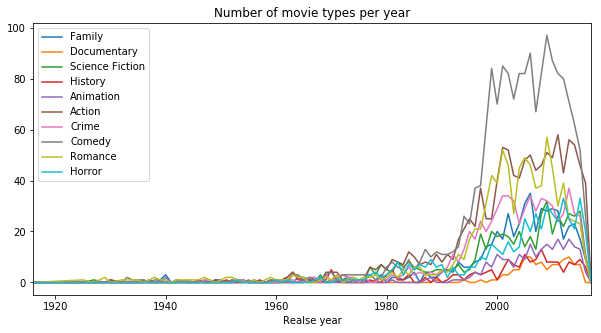

In [145]:
#結果呈現，繪圖
plt.figure(figsize=(10,5),facecolor='w')
ax1=plt.subplot(1,1,1)#多和一呈現
year_cnt.plot(kind='line',ax=ax1)
plt.title("Number of movie types per year")
plt.xlabel("Realse year")

(1) 電影產量逐年增加
(2) 近年來主要的電影類型為：喜劇、動作、愛情

## 2.找出歷年來發片數量最多的電影類型

In [146]:
#不同類型電影數量
genre=year_cnt.sum(axis=0)
genre=genre.sort_values(ascending=True)
genre

Documentary         110
History             197
Animation           234
Family              513
Horror              519
Science Fiction     535
Crime               696
Romance             894
Action             1154
Comedy             1722
dtype: int64

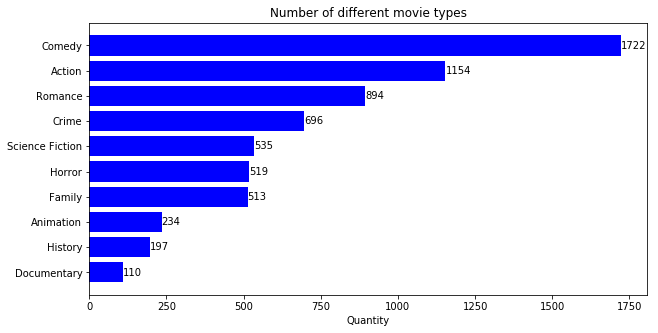

In [147]:
#結果呈現，繪製長條圖
plt.figure(figsize=(10,5))
ax2=plt.subplot(1,1,1)
label=list(genre.index)
data=genre.values
rect=ax2.barh(range(len(label)),data,color='b',alpha=1)
ax2.set_title("Number of different movie types")
ax2.set_yticks(range(len(label)))
ax2.set_yticklabels(label)
plt.xlabel("Quantity")

#數據標籤
for x,y in zip(data,range(len(label))):
    ax2.text(x,y,'{}'.format(x),ha='left',va='center')

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
from sklearn import svm
total = 0
size = 20
for i in range(size):
    movies=pd.read_csv("tmdb_5000_movies.csv",sep=',')
    movies.loc[2656,'runtime']=98
    movies.loc[4140,'runtime']=82
    y_train = movies['revenue']
    actual = movies.iloc[i]['revenue']
    del movies['homepage']
    del movies['spoken_languages']
    del movies['original_language']
    del movies['original_title']
    del movies['overview']
    del movies['tagline']
    del movies['status']
    del movies['revenue']
    del movies['genres']
    del movies['id']
    del movies['keywords']
    del movies['production_companies']
    del movies['production_countries']
    del movies['release_date']
    del movies['title']
    del movies['popularity']
    del movies['runtime']
    x_test = [movies.iloc[i]]
    movies.drop(movies.index[i], inplace = True)
    y_train.drop(y_train.index[i], inplace = True)
#print(actual_x.head())
    del movies['revenue']

    model = svm.SVC(gamma='scale')
    model.fit(movies, y_train)
    y_pred = model.predict(x_test)
    total = total + abs(y_pred-actual)
print("MAE",total/size,sep=':')

MAE:[4.31503897e+08]


(1) 歷年來電影產量：喜劇 > 動作 > 愛情 > 偵探 > 科幻
票房絕對平均差約四億美金

## 對這堂課的建議與希望學到的東西
(吳澍)希望可以不拘語言進行作業，例如：Matlab。
(黃偉豪)希望能再簡化到讓初學者了解, 並建議理學院將Python的入門課程開在這門課之前。
(王子軒)希望能夠將課程簡化，讓沒學過程式語言的同學能夠容易上手，且課程內容相互關聯上能夠緊密些